# Exploring Data

**GOAL**:

- Load and describe dataset, variables, and variable types
- Explore categorical features and quantitative features using basic measures of center and spread (`.describe()`)
- Filter categorical and quantitative features by logical criteria
- Explore groups of categories using the `.groupby()` method.
- Use `.nlargest()` and `.nsmallest()` to filter large and small values of interest

## Load and Describe

Below, we have a dataset from NYCOpenData related to police incidents.  First, we load in the dataset using the `pd.read_csv()` method.  Then, using the `.info()` method, we can examine the different features, feature data types, and missing values in the data.

In [1]:
import pandas as pd

In [2]:
police = pd.read_csv('data/nyc_police_incidents.csv')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (12,18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
police.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
Unnamed: 0           100000 non-null int64
addr_pct_cd          99999 non-null float64
boro_nm              99997 non-null object
cmplnt_fr_dt         99993 non-null object
cmplnt_fr_tm         100000 non-null object
cmplnt_num           100000 non-null int64
cmplnt_to_dt         73252 non-null object
cmplnt_to_tm         73272 non-null object
crm_atpt_cptd_cd     100000 non-null object
hadevelopt           2532 non-null object
juris_desc           100000 non-null object
ky_cd                100000 non-null int64
lat_lon              11 non-null object
latitude             11 non-null float64
law_cat_cd           100000 non-null object
loc_of_occur_desc    56034 non-null object
longitude            11 non-null float64
ofns_desc            99662 non-null object
parks_nm             541 non-null object
pd_cd                100000 non-null float64
pd_desc              100000 non-n

### Split, Apply, Combine

Using the `.groupby()` method is a great way to explore patterns within a categorical variable.  The effect of grouping our data based on boro name would allow us to then apply some kind of summary to the individual groups.  The image below demonstrate splitting and applying the mean to each group.  In our data, for example, if we wanted to know the number of complaints by borough, we could groupby the boro name and select a relevant column to count.  
![](images/sac.png)



In [4]:
police.groupby('boro_nm')['cmplnt_fr_dt'].count()

boro_nm
BRONX            22227
BROOKLYN         20980
MANHATTAN        20657
QUEENS           31733
STATEN ISLAND     4393
Name: cmplnt_fr_dt, dtype: int64

If we wanted to plot the results, we can save the results as a variable and use a bar plot where we pull the names to be the horizontal values, and the count to be the height.  The names are the indicies of our variable; i.e. `bor.index()`.  The actual values are the only contents of `bor`.

In [5]:
bor = police.groupby('boro_nm')['cmplnt_fr_dt'].count()

In [6]:
bor

boro_nm
BRONX            22227
BROOKLYN         20980
MANHATTAN        20657
QUEENS           31733
STATEN ISLAND     4393
Name: cmplnt_fr_dt, dtype: int64

In [7]:
bor[0]

22227

In [8]:
type(bor)

pandas.core.series.Series

In [9]:
bor.index

Index(['BRONX', 'BROOKLYN', 'MANHATTAN', 'QUEENS', 'STATEN ISLAND'], dtype='object', name='boro_nm')

In [10]:
bor[:]

boro_nm
BRONX            22227
BROOKLYN         20980
MANHATTAN        20657
QUEENS           31733
STATEN ISLAND     4393
Name: cmplnt_fr_dt, dtype: int64

In [11]:
plt.bar(bor.index, bor)

NameError: name 'plt' is not defined

### Examining Wine Reviews

![](images/kwine.png)

Below, we use a dataset on wine reviews from kaggle.com.  Again, we want to do some basic explorations of the data.  Here, we load in our zip file and examine the data.

In [12]:
wine = pd.read_csv('data/winemag-data-130k-v2.csv.zip', compression = 'zip')

In [13]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
Unnamed: 0               129971 non-null int64
country                  129908 non-null object
description              129971 non-null object
designation              92506 non-null object
points                   129971 non-null int64
price                    120975 non-null float64
province                 129908 non-null object
region_1                 108724 non-null object
region_2                 50511 non-null object
taster_name              103727 non-null object
taster_twitter_handle    98758 non-null object
title                    129971 non-null object
variety                  129970 non-null object
winery                   129971 non-null object
dtypes: float64(1), int64(2), object(11)
memory usage: 13.9+ MB


Because we are dealing with wine ratings, we want to understand the good and bad.  Further, we may be interested in affordable good wines.  Accordingly, we would want to filter the price column to limit this boundary, and then find the highest reviewed wines.  For me, I will set the limit at 11 dollars.  Then, I want to see the best and worst wines and their information.

In [14]:
chuck = wine[wine['price'] < 11]

In [15]:
chuck.nlargest(5, 'points')

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
10386,10386,US,"A marvelous effort in a difficult year, this t...",NaN,91,9.0,Washington,Columbia Valley (WA),Columbia Valley,Paul Gregutt,@paulgwine,Chateau Ste. Michelle 2011 Riesling (Columbia ...,Riesling,Chateau Ste. Michelle
11955,11955,Portugal,"A firm wine, based on dry tannins and some den...",Mural Reserva,91,10.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta do Portal 2007 Mural Reserva Red (Douro),Portuguese Red,Quinta do Portal
18310,18310,Portugal,Orange peel aromas emerge on this delectable f...,NaN,91,10.0,Moscatel de Setúbal,NaN,NaN,Roger Voss,@vossroger,José Maria da Fonseca 2007 Moscatel de Setúbal,Moscatel,José Maria da Fonseca
26101,26101,US,"With full ripeness, density and concentration,...",Winemaker's Select,91,8.0,Washington,Columbia Valley (WA),Columbia Valley,Paul Gregutt,@paulgwine,Snoqualmie 2006 Winemaker's Select Riesling (C...,Riesling,Snoqualmie
27415,27415,US,"Gorgeous aromas of peach, pear, flower and spi...",NaN,91,10.0,Washington,Columbia Valley (WA),Columbia Valley,Paul Gregutt,@paulgwine,Barnard Griffin 2012 Riesling (Columbia Valley...,Riesling,Barnard Griffin


In [16]:
chuck.nsmallest(5, 'points')

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
3640,3640,Portugal,Aromas of strawberry sherbet are followed by s...,Estreia,80,8.0,Vinho Verde,NaN,NaN,Roger Voss,@vossroger,Viniverde 2011 Estreia Rosé (Vinho Verde),Rosé,Viniverde
7333,7333,US,"Too sweet by far for a table wine, with simple...",NaN,80,10.0,California,California,California Other,NaN,NaN,Esser Cellars 2005 Zinfandel (California),Zinfandel,Esser Cellars
11085,11085,France,A white this age should be fresh and crisp; th...,NaN,80,8.0,Southwest France,Bergerac,NaN,Joe Czerwinski,@JoeCz,Seigneurs de Bergerac 1999 White (Bergerac),White Blend,Seigneurs de Bergerac
13782,13782,Chile,"Yeasty, melony and smelling like yellow mustar...",Left Coast,80,7.0,Chile,NaN,NaN,Michael Schachner,@wineschach,flipflop NV Left Coast Moscato (Chile),Moscato,flipflop
15609,15609,Argentina,Beware of funky labeled Malbecs because many d...,NaN,80,10.0,Mendoza Province,Mendoza,NaN,Michael Schachner,@wineschach,Ku Dé Ta 2006 Malbec (Mendoza),Malbec,Ku Dé Ta


If we wanted to see the largest producers of different varieties of wine, we could group by country, select the variety column, and apply a count on this.  To only see the five largest, we can then use the `.nlargest(5)` on the outcome of our split-apply-combine routine.

In [17]:
wine.groupby('country')['variety'].count().nlargest(5)

country
US          54504
France      22093
Italy       19540
Spain        6645
Portugal     5691
Name: variety, dtype: int64

In [18]:
wine['points'].hist()

In [19]:
wine['points'].describe()

count    129971.000000
mean         88.447138
std           3.039730
min          80.000000
25%          86.000000
50%          88.000000
75%          91.000000
max         100.000000
Name: points, dtype: float64

### PROBLEMS

1. What is the top rated red wine under eighteen dollars a bottle?  Lowest rated white in the same price range?

2. What reviewers were the most generous?  The least?  Describe your approach.

3. Suppose we have the following data read in as a pandas dataframe called `df`.  

| id | name | age | speed | color | 
|  ----- | ----- | ----- | ----- | ----- |
| 1 | Hennessy | 12 | 4.2 | red |
| 2 | Tino | 5 | 6.9 | white |
| 3 | Oden | 11 | 5.5 | yellow |
| 4 | LuLu | 6  | 4.5 | red |

Write the result of the following operations

- `df['name']`
- `df['color'].value_counts()`
- `df.nlargest(2, 'age')`
- `df.describe()`
- `df.groupby('color')['age'].mean()`


4. Go back to the wine data.  Write down five purely descriptive questions that could be answered from the data.  

5. Choose three of your questions and provide an initial answer.  If you run into problems please post in slack.  

6. Find a tutorial online dealing with Pandas.  One place to look is the Pandas documentation (https://pandas.pydata.org/pandas-docs/stable/tutorials.html).  Go through the tutorial and write a few sentences describing the topic, what you learned, and what you are still confused about in terms of operations with Pandas.  There are many youtube tutorials, blogs, and open source texts that detail python and pandas, find something you're interested in, you will be sharing this with the class.

In [20]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
Unnamed: 0               129971 non-null int64
country                  129908 non-null object
description              129971 non-null object
designation              92506 non-null object
points                   129971 non-null int64
price                    120975 non-null float64
province                 129908 non-null object
region_1                 108724 non-null object
region_2                 50511 non-null object
taster_name              103727 non-null object
taster_twitter_handle    98758 non-null object
title                    129971 non-null object
variety                  129970 non-null object
winery                   129971 non-null object
dtypes: float64(1), int64(2), object(11)
memory usage: 13.9+ MB


In [21]:
u18 = wine[wine['price'] <= 18]

In [22]:
u18.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
5,5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
6,6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo


In [24]:
u18.nlargest(15, 'points')

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
6267,6267,US,This tastes like a more concentrated and sweet...,Lucille Late Harvest,94,18.0,Washington,Yakima Valley,Columbia Valley,Paul Gregutt,@paulgwine,Stottle 2011 Lucille Late Harvest Viognier (Ya...,Viognier,Stottle
19136,19136,Spain,"A spectacularly sweet and rich bruiser, and on...",Pedro Ximenez 1827 Sweet Sherry,94,14.0,Andalucia,Jerez,NaN,Michael Schachner,@wineschach,Osborne NV Pedro Ximenez 1827 Sweet Sherry She...,Sherry,Osborne
23974,23974,Portugal,Assobio is from a single vineyard in the Quint...,Assobio,94,13.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Murças 2011 Assobio Red (Douro),Portuguese Red,Quinta dos Murças
39318,39318,France,"A rich, sweet wine that maintains complete fre...",Symphonie de Novembre,94,18.0,Southwest France,Jurançon,NaN,Roger Voss,@vossroger,Domaine Cauhapé 2011 Symphonie de Novembre (J...,Petit Manseng,Domaine Cauhapé
69526,69526,US,This dry Moscato Giallo from Lodi is delicious...,Secco,94,16.0,California,Lodi,Central Valley,Virginie Boone,@vboone,Uvaggio 2010 Secco Moscato Giallo (Lodi),Moscato Giallo,Uvaggio
84597,84597,US,"A gorgeous, rich and aromatic Riesling, this i...",Estate,94,18.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,David Hill 2013 Estate Riesling (Willamette Va...,Riesling,David Hill
88682,88682,Austria,A little air is all that is needed to shake th...,Vm Berg,94,18.0,Kamptal,NaN,NaN,Anne Krebiehl MW,@AnneInVino,Eichinger 2014 Vm Berg Riesling (Kamptal),Riesling,Eichinger
98438,98438,US,Vintner Carr follows up on his great 2008 Rese...,Dijon Clone,94,18.0,California,Sonoma Coast,Sonoma,NaN,NaN,Joseph Carr 2009 Dijon Clone Chardonnay (Sonom...,Chardonnay,Joseph Carr
123776,123776,US,"Don't let the cartoony label fool you, this is...",Petite Petit,94,18.0,California,Lodi,Central Valley,Jim Gordon,@gordone_cellars,Michael David 2012 Petite Petit Petite Sirah (...,Petite Sirah,Michael David
3843,3843,Portugal,"This is a smooth, impressively rich wine power...",Aguia Moura em Vinhas Velhas Reserva,93,18.0,Douro,NaN,NaN,Roger Voss,@vossroger,Wines & Winemakers 2009 Aguia Moura em Vinhas ...,Portuguese Red,Wines & Winemakers


In [28]:
%matplotlib inline
import matplotlib.pyplot as plt

(80, 93)

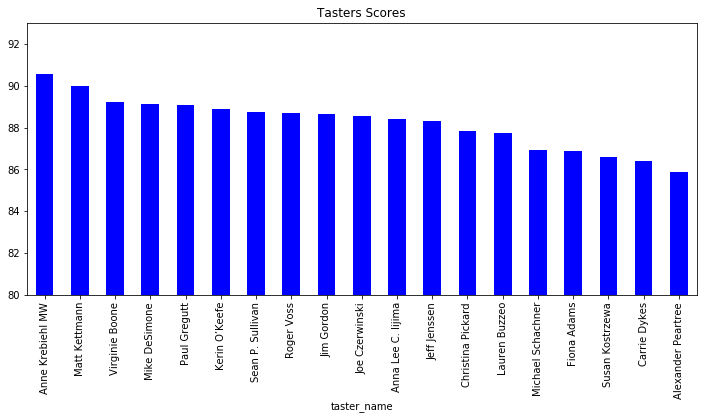

In [31]:
wine.groupby('taster_name')['points'].mean().sort_values(ascending = False).plot(kind = 'bar', figsize = (12, 5), title = 'Tasters Scores', color = 'blue')
plt.ylim(80, 93)